In [1]:
# Modules for data processing
import numpy as np
import os
from netCDF4 import Dataset
import scipy.io as sio
import xlrd

# Modules for plotting
from ipywidgets import *
import matplotlib.pyplot as plt
%matplotlib inline
import bokeh.io
import bokeh.mpl
import bokeh.plotting
bokeh.io.output_notebook()
import seaborn as sns
sns.set_style(style='white')

Loading BokehJS ...

#### Option 1: Load data from an Excel file
<pre>
workbook = xlrd.open_workbook(<span style="color:#cc7a00"><b>'EXCEL_FILE.xlsx'</b></span>)
sheet_names = workbook.sheet_names()
sheet = workbook.sheet_by_name(sheet_names[i])
</pre>

#### Option 2: Load data from a Matlab file
<pre>
matfile  = sio.loadmat(<span style="color:#cc7a00"><b>'MATLAB_FILE.mat'</b></span>)
data = matfile[<span style="color:#cc7a00"><b>'VARIABLE_TOPOGRAPHY'</b></span>]
</pre>

#### Option 3: Load data from a netCDF file
<pre>
nc_fid = Dataset(<span style="color:#cc7a00"><b>'NETCDF_FILE.nc'</b></span>, 'r')
data = nc_fid.variables[<span style="color:#cc7a00"><b>VARIABLE_TOPOGRAPHY</b></span>][:]
</pre>

#### Run the command below to create forcing for Dhara model

In [2]:
# Load matlab file
matfile  = sio.loadmat('flux_data.mat')

# Load variables
LAI_in = matfile['LAI_in']
LAD_in = np.array([
        0.0010, 0.0337, 0.0661, 0.0610, 0.0575,
        0.0575, 0.0660, 0.0644, 0.0629, 0.0720,
        0.0891, 0.1110, 0.1395, 0.0945, 0.0250])
rootfr_in = np.array([
        0.8100, 0.1000, 0.0400, 0.0200, 0.0130, 
        0.0070, 0.0040, 0.0030, 0.0020, 0.0001, 
        0.0001, 0.0001, 0.0001, 0.0001, 0.0001])

nl_can_in    = len(LAD_in)
nl_soil_in   = len(rootfr_in)
num_steps_in = len(LAI_in)

# Check/create folder and topography file name
folder = 'data'
filename_output = 'soybean.nc'
if not os.path.exists(folder):
    os.makedirs(folder)

################################################################
# DO NOT CHANGE BELOW THIS LINE --------------------------------
################################################################

plant = Dataset(folder + '/' + filename_output, 'w', format='NETCDF4')
plant.description = 'Vegetation data for Dhara'

# Set up dimension
plant.createDimension('canopy', nl_can_in)  # canopy variable
plant.createDimension('soil', nl_soil_in)   # soil variable
plant.createDimension('time', num_steps_in) # time variable
plant.createDimension('scalar', 1)          # Scalar variable

"""
Create variables in the netcdf file
    var = netcdf.createVariable('Var_name', 'var_type', ('dimension_type'))
"""
LAI       = plant.createVariable('LeafAreaIndex', 'f8', ('time'))
LAD       = plant.createVariable('LeafAreaDensity', 'f8', ('canopy'))
rootfr    = plant.createVariable('RootFraction', 'f8', ('soil'))
nl_can    = plant.createVariable('NumCanoyLayers', 'i4', ('scalar'))
nl_soil   = plant.createVariable('NumSoilLayers', 'i4', ('scalar'))
num_steps = plant.createVariable('NumTimeSteps', 'i4', ('scalar'))


# Assign data to variables in NetCDF file
LAI[:]       = LAI_in
LAD[:]       = LAD_in
rootfr[:]    = rootfr_in
nl_can[:]    = nl_can_in
nl_soil[:]   = nl_soil_in
num_steps[:] = num_steps_in

# Close the file
plant.close()

#### OPTIONAL -- If you want to visualize canopy and root profiles

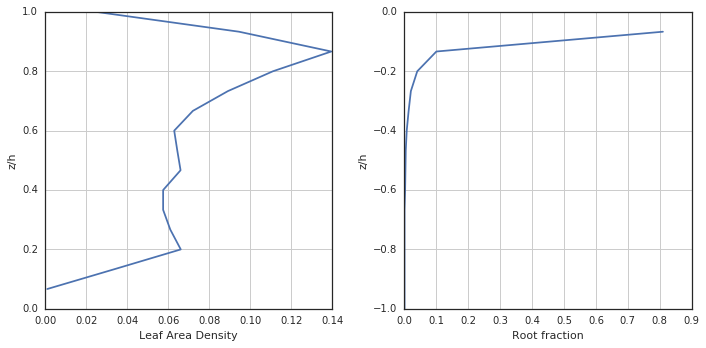

In [3]:
ylad = np.linspace(1,nl_can_in,nl_can_in)
ysoil = np.linspace(1,nl_soil_in,nl_soil_in)

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(10,5))        
ax[0].plot(LAD_in, ylad/nl_can_in)
ax[0].set_xlabel('Leaf Area Density')
ax[0].set_ylabel('z/h')
ax[0].grid(True)
ax[1].plot(rootfr_in, -ysoil/nl_soil_in)
ax[1].set_xlabel('Root fraction')
ax[1].set_ylabel('z/h')
ax[1].grid(True)
plt.tight_layout()

#### and Leaf Area Index data

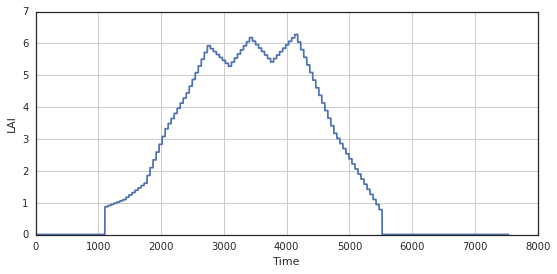

In [4]:
# Plotting data
fig, ax = plt.subplots(figsize=(9,4))
ax.plot(LAI_in)
ax.set_xlabel('Time')
ax.set_ylabel('LAI')
ax.grid(True)